In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [217]:
observations = pd.read_csv('observations.csv')
speciesInfo = pd.read_csv('species_info.csv')

In [219]:
observations.head()

scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85

In [221]:
speciesInfo.head()

category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN

In [223]:
print(speciesInfo.scientific_name.nunique())
print(observations.scientific_name.nunique())

5541
5541


In [225]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [227]:
speciesInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [229]:
speciesInfo.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [231]:
#speciesInfo.category.value_counts().reset_index()

In [442]:
endSpeciesInfo = speciesInfo[pd.isna(speciesInfo.conservation_status) == False].reset_index(drop=True)
endSpeciesInfo.head()

category            scientific_name       common_names conservation_status
0   Mammal              Canis latrans             Coyote  Species of Concern
1   Mammal                Canis lupus          Gray Wolf          Endangered
2   Mammal                Canis rufus           Red Wolf          Endangered
3   Mammal           Eptesicus fuscus      Big Brown Bat  Species of Concern
4   Mammal  Lasionycteris noctivagans  Silver-Haired Bat  Species of Concern

In [235]:
speciesInfo.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [237]:
categoriesColorMap = {'Mammal': '#fcad03',
                      'Bird': '#6ca3e6',
                      'Reptile': '#663f1e',
                      'Amphibian': '#48ab7d',
                      'Fish': '#07338c',
                      'Vascular Plant': '#26bd26',
                      'Nonvascular Plant': '#4d6316'}
categoriesColorMap

{'Mammal': '#fcad03',
 'Bird': '#6ca3e6',
 'Reptile': '#663f1e',
 'Amphibian': '#48ab7d',
 'Fish': '#07338c',
 'Vascular Plant': '#26bd26',
 'Nonvascular Plant': '#4d6316'}

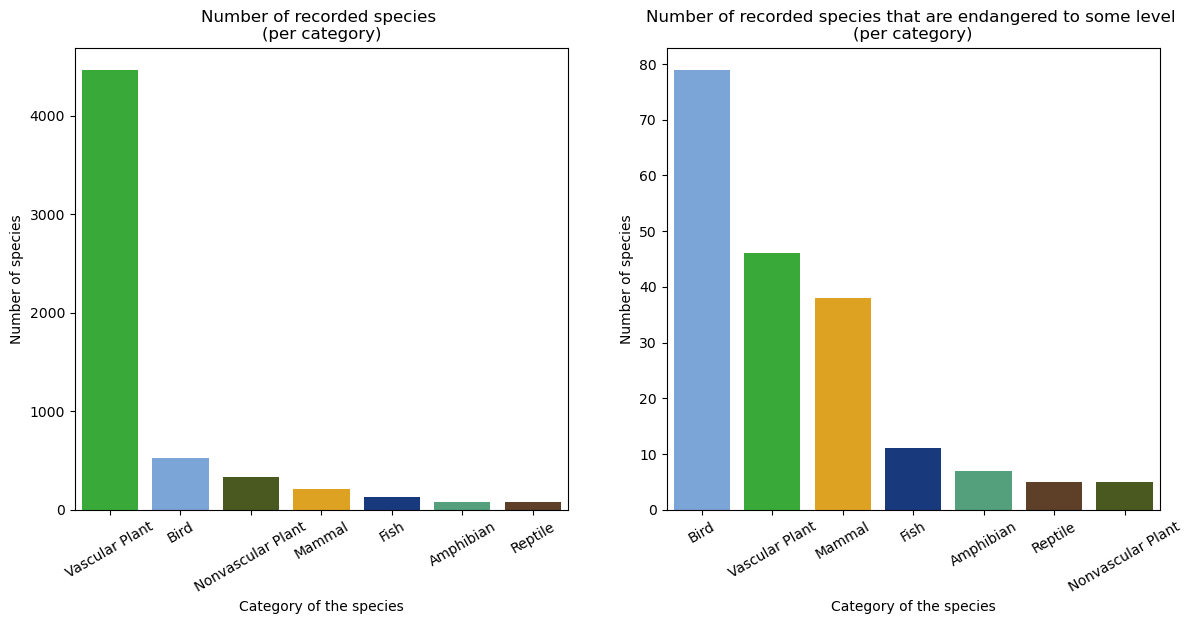

In [239]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x = 'category', y = 'count', data=speciesInfo.category.value_counts(ascending=False).reset_index(),
            hue='category', palette=categoriesColorMap)
plt.xlabel('Category of the species')
plt.ylabel('Number of species')
plt.title('Number of recorded species \n(per category)')
plt.xticks(rotation=30)

plt.subplot(1,2,2)
sns.barplot(x = 'category', y = 'count', data=endSpeciesInfo.category.value_counts(ascending=False).reset_index(),
            hue='category', palette=categoriesColorMap)
plt.xlabel('Category of the species')
plt.ylabel('Number of species')
plt.title('Number of recorded species that are endangered to some level \n(per category)')
plt.xticks(rotation=30)

plt.show()
plt.close()

In [241]:
print(len(speciesInfo[speciesInfo.category == 'Bird'])/len(speciesInfo))
len(endSpeciesInfo[endSpeciesInfo.category == 'Bird'])/len(endSpeciesInfo)

0.08945741758241758


0.41361256544502617

In [444]:
endSpeciesInfo_dummies = pd.get_dummies(data=endSpeciesInfo, columns=['conservation_status'])
endSpeciesInfo_dummies.head()

category            scientific_name       common_names  \
0   Mammal              Canis latrans             Coyote   
1   Mammal                Canis lupus          Gray Wolf   
2   Mammal                Canis rufus           Red Wolf   
3   Mammal           Eptesicus fuscus      Big Brown Bat   
4   Mammal  Lasionycteris noctivagans  Silver-Haired Bat   

   conservation_status_Endangered  conservation_status_In Recovery  \
0                           False                            False   
1                            True                            False   
2                            True                            False   
3                           False                            False   
4                           False                            False   

   conservation_status_Species of Concern  conservation_status_Threatened  
0                                    True                           False  
1                                   False                           False  
2                                   False                           False  
3                                    True                           False  
4                                    True                           False

In [448]:
endSpeciesInfo_dummies.drop(columns=['scientific_name', 'common_names'], inplace=True)
endSpeciesInfo_dummies.head()

category  conservation_status_Endangered  conservation_status_In Recovery  \
0   Mammal                           False                            False   
1   Mammal                            True                            False   
2   Mammal                            True                            False   
3   Mammal                           False                            False   
4   Mammal                           False                            False   

   conservation_status_Species of Concern  conservation_status_Threatened  
0                                    True                           False  
1                                   False                           False  
2                                   False                           False  
3                                    True                           False  
4                                    True                           False

In [251]:
countsPerStatus = {}

In [450]:
for species in categoriesColorMap.keys():
    countsPerStatus[species] = []
    for status in range(4):
        countsPerStatus[species].append(endSpeciesInfo_dummies.loc[endSpeciesInfo_dummies['category'] == species, endSpeciesInfo_dummies.columns[1+status]].sum())
countsPerStatus

{'Mammal': [7, 1, 28, 2],
 'Bird': [4, 3, 72, 0],
 'Reptile': [0, 0, 5, 0],
 'Amphibian': [1, 0, 4, 2],
 'Fish': [3, 0, 4, 4],
 'Vascular Plant': [1, 0, 43, 2],
 'Nonvascular Plant': [0, 0, 5, 0]}

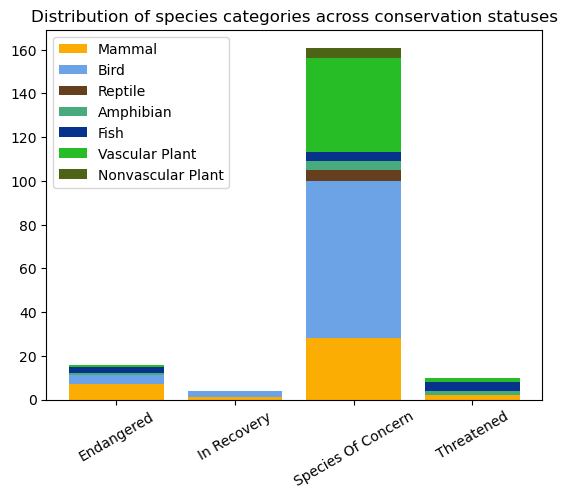

In [452]:
bottomVal = np.array([0,0,0,0])
ax = plt.subplot()
for species in categoriesColorMap.keys():
    plt.bar(range(4), countsPerStatus[species], label = species, bottom=bottomVal, color=categoriesColorMap[species])
    bottomVal += countsPerStatus[species]
plt.legend()
ax.set_xticks(range(4))
ax.set_xticklabels(['Endangered', 'In Recovery', 'Species Of Concern', 'Threatened'])
plt.xticks(rotation=30)
plt.title('Distribution of species categories across conservation statuses')
plt.show()
plt.close()

In [258]:
observations.head()

scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85

In [454]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [462]:
parkAnalysis = pd.merge(observations, speciesInfo)
parkAnalysis.head()

scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1            77          Mammal                       American Mink   
2           138  Vascular Plant                        Klamath Plum   
3            84  Vascular Plant                          Velvetleaf   
4            85  Vascular Plant                      Common Bluecup   

  conservation_status  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

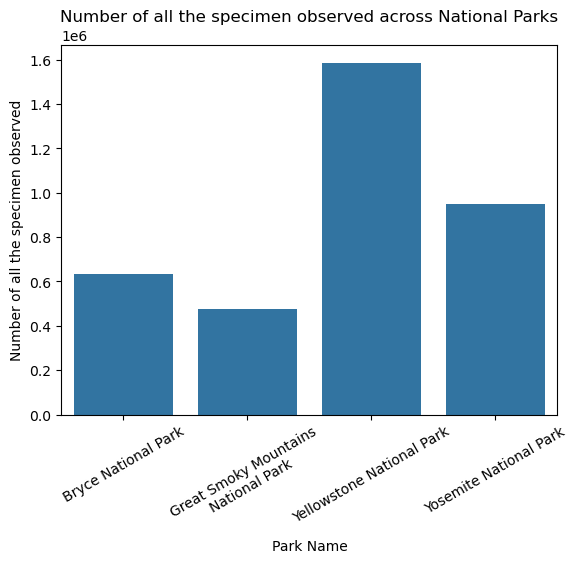

"\nplt.figure(figsize=(14,14))\n\nplt.subplot(2,2,1)\nsns.barplot(x='category', y='observations', data=parkAnalysis[parkAnalysis.park_name == 'Yellowstone National Park'].groupby('category').observations.sum().reset_index(), hue='category', palette=categoriesColorMap)\nplt.xticks(rotation=30)\nplt.xlabel('Category of species')\nplt.ylabel('Number of specimen observed')\nplt.title('Number of specimen observed per category in Yellowstone National Park')\n\nplt.subplot(2,2,2)\nsns.barplot(x='category', y='observations', data=parkAnalysis[parkAnalysis.park_name == 'Great Smoky Mountains National Park'].groupby('category').observations.sum().reset_index(), hue='category', palette=categoriesColorMap)\nplt.xticks(rotation=30)\nplt.xlabel('Category of species')\nplt.ylabel('Number of specimen observed')\nplt.title('Number of specimen observed per category in Great Smoky Mountains National Park')\n\nplt.subplot(2,2,3)\nsns.barplot(x='category', y='observations', data=parkAnalysis[parkAnalysis.p

In [464]:
ax = plt.subplot()
sns.barplot(x='park_name', y='observations', data=parkAnalysis.groupby('park_name').observations.sum().reset_index())
plt.xticks(rotation=30)
ax.set_xticks(range(4))
ax.set_xticklabels(['Bryce National Park','Great Smoky Mountains\nNational Park','Yellowstone National Park','Yosemite National Park'])
plt.xlabel('Park Name')
plt.ylabel('Number of all the specimen observed')
plt.title('Number of all the specimen observed across National Parks')
plt.show()
plt.close()

'''
plt.figure(figsize=(14,14))

plt.subplot(2,2,1)
sns.barplot(x='category', y='observations', data=parkAnalysis[parkAnalysis.park_name == 'Yellowstone National Park'].groupby('category').observations.sum().reset_index(), hue='category', palette=categoriesColorMap)
plt.xticks(rotation=30)
plt.xlabel('Category of species')
plt.ylabel('Number of specimen observed')
plt.title('Number of specimen observed per category in Yellowstone National Park')

plt.subplot(2,2,2)
sns.barplot(x='category', y='observations', data=parkAnalysis[parkAnalysis.park_name == 'Great Smoky Mountains National Park'].groupby('category').observations.sum().reset_index(), hue='category', palette=categoriesColorMap)
plt.xticks(rotation=30)
plt.xlabel('Category of species')
plt.ylabel('Number of specimen observed')
plt.title('Number of specimen observed per category in Great Smoky Mountains National Park')

plt.subplot(2,2,3)
sns.barplot(x='category', y='observations', data=parkAnalysis[parkAnalysis.park_name == 'Bryce National Park'].groupby('category').observations.sum().reset_index(), hue='category', palette=categoriesColorMap)
plt.xticks(rotation=30)
plt.xlabel('Category of species')
plt.ylabel('Number of specimen observed')
plt.title('Number of specimen observed per category in Bryce National Park')

plt.subplot(2,2,4)
sns.barplot(x='category', y='observations', data=parkAnalysis[parkAnalysis.park_name == 'Yosemite National Park'].groupby('category').observations.sum().reset_index(), hue='category', palette=categoriesColorMap)
plt.xticks(rotation=30)
plt.xlabel('Category of species')
plt.ylabel('Number of specimen observed')
plt.title('Number of specimen observed per category in Yosemite National Park')

plt.tight_layout()
plt.show()
plt.close()
'''

In [466]:
categoriesColorMap.keys()

dict_keys(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant'])

In [468]:
endSpeciesInfo.conservation_status.unique()


array(['Species of Concern', 'Endangered', 'Threatened', 'In Recovery'],
      dtype=object)

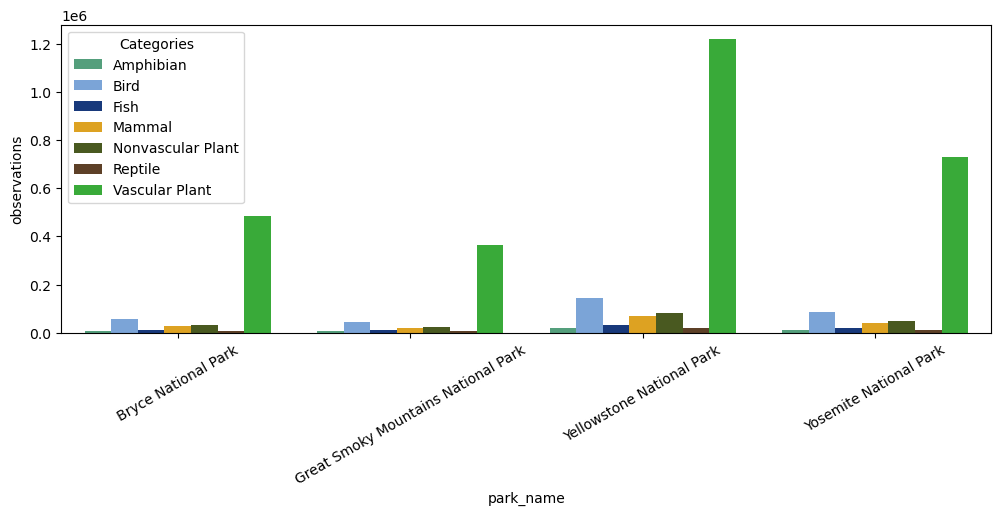

In [473]:
plt.figure(figsize=(12,4))
sns.barplot(x='park_name', y='observations', data=parkAnalysis.groupby(['park_name','category']).observations.sum().reset_index(), hue='category', palette=categoriesColorMap)
plt.xticks(rotation=30)
plt.legend(title='Categories', fancybox=True)
plt.show()

In [483]:
parkAnalysis.groupby(['park_name','category'])[['observations', 'scientific_name']].max().reset_index()

park_name           category  observations  \
0                   Bryce National Park          Amphibian           133   
1                   Bryce National Park               Bird           164   
2                   Bryce National Park               Fish           154   
3                   Bryce National Park             Mammal           167   
4                   Bryce National Park  Nonvascular Plant           156   
5                   Bryce National Park            Reptile           155   
6                   Bryce National Park     Vascular Plant           176   
7   Great Smoky Mountains National Park          Amphibian           119   
8   Great Smoky Mountains National Park               Bird           139   
9   Great Smoky Mountains National Park               Fish           133   
10  Great Smoky Mountains National Park             Mammal           127   
11  Great Smoky Mountains National Park  Nonvascular Plant           126   
12  Great Smoky Mountains National Park            Reptile           117   
13  Great Smoky Mountains National Park     Vascular Plant           147   
14            Yellowstone National Park          Amphibian           301   
15            Yellowstone National Park               Bird           305   
16            Yellowstone National Park               Fish           300   
17            Yellowstone National Park             Mammal           296   
18            Yellowstone National Park  Nonvascular Plant           307   
19            Yellowstone National Park            Reptile           307   
20            Yellowstone National Park     Vascular Plant           321   
21               Yosemite National Park          Amphibian           187   
22               Yosemite National Park               Bird           207   
23               Yosemite National Park               Fish           203   
24               Yosemite National Park             Mammal           203   
25               Yosemite National Park  Nonvascular Plant           210   
26               Yosemite National Park            Reptile           204   
27               Yosemite National Park     Vascular Plant           223   

                        scientific_name  
0                       Taricha sierrae  
1                   Zonotrichia querula  
2                    Thymallus arcticus  
3                        Zapus princeps  
4   Zygodon viridissimus var. rupestris  
5            Virginia valeriae valeriae  
6                      Zizia trifoliata  
7                       Taricha sierrae  
8                   Zonotrichia querula  
9                    Thymallus arcticus  
10                       Zapus princeps  
11  Zygodon viridissimus var. rupestris  
12           Virginia valeriae valeriae  
13                     Zizia trifoliata  
14                      Taricha sierrae  
15                  Zonotrichia querula  
16                   Thymallus arcticus  
17                       Zapus princeps  
18  Zygodon viridissimus var. rupestris  
19           Virginia valeriae valeriae  
20                     Zizia trifoliata  
21                      Taricha sierrae  
22                  Zonotrichia querula  
23                   Thymallus arcticus  
24                       Zapus princeps  
25  Zygodon viridissimus var. rupestris  
26           Virginia valeriae valeriae  
27                     Zizia trifoliata

In [499]:
plt.figure(figsize=(12,6))
sns.barplot(x='park_name', y='observations', data=parkAnalysis.loc[parkAnalysis.groupby(['park_name','category']).observations.idmax(), ['park_name','category','observations','scientific_name']], hue='category', palette=categoriesColorMap)
plt.xticks(rotation=30)
plt.legend(title='Categories')
plt.show()

AttributeError: 'SeriesGroupBy' object has no attribute 'idmax'

<Figure size 1200x600 with 0 Axes>

In [495]:
parkAnalysis[(parkAnalysis.category == 'Bird') & (parkAnalysis.park_name == 'Bryce National Park')].sort_values(by='observations')

scientific_name            park_name  observations category  \
7105       Vermivora bachmanii  Bryce National Park            20     Bird   
15161           Grus americana  Bryce National Park            24     Bird   
23087        Picoides borealis  Bryce National Park            24     Bird   
8263   Gymnogyps californianus  Bryce National Park            30     Bird   
21614           Cathartes aura  Bryce National Park            49     Bird   
...                        ...                  ...           ...      ...   
21664          Melanitta nigra  Bryce National Park           147     Bird   
1373       Phasianus colchicus  Bryce National Park           148     Bird   
6435        Certhia familiaris  Bryce National Park           158     Bird   
21549      Nyctanassa violacea  Bryce National Park           160     Bird   
14253            Bubulcus ibis  Bryce National Park           164     Bird   

                                    common_names conservation_status  
7105   Bachman's Warbler, Bachman's Wood Warbler          Endangered  
15161                             Whooping Crane          Endangered  
23087                    Red-Cockaded Woodpecker          Endangered  
8263                           California Condor          Endangered  
21614                             Turkey Vulture  Species of Concern  
...                                          ...                 ...  
21664                               Black Scoter                 NaN  
1373       Common Pheasant, Ring-Necked Pheasant                 NaN  
6435                        Eurasian Treecreeper                 NaN  
21549                 Yellow-Crowned Night-Heron                 NaN  
14253         Cattle Egret, Western Cattle Egret                 NaN  

[591 rows x 6 columns]

In [507]:
parkAnalysis.loc[parkAnalysis.groupby(['park_name','category']).observations.idxmax(), ['park_name','category','observations','scientific_name']]

park_name           category  observations  \
5835                   Bryce National Park          Amphibian           133   
14253                  Bryce National Park               Bird           164   
25524                  Bryce National Park               Fish           154   
12234                  Bryce National Park             Mammal           167   
24529                  Bryce National Park  Nonvascular Plant           156   
2863                   Bryce National Park            Reptile           155   
14497                  Bryce National Park     Vascular Plant           176   
13912  Great Smoky Mountains National Park          Amphibian           119   
19101  Great Smoky Mountains National Park               Bird           139   
12333  Great Smoky Mountains National Park               Fish           133   
23522  Great Smoky Mountains National Park             Mammal           127   
15931  Great Smoky Mountains National Park  Nonvascular Plant           126   
25261  Great Smoky Mountains National Park            Reptile           117   
9737   Great Smoky Mountains National Park     Vascular Plant           147   
8032             Yellowstone National Park          Amphibian           301   
540              Yellowstone National Park               Bird           305   
8983             Yellowstone National Park               Fish           300   
8901             Yellowstone National Park             Mammal           296   
7455             Yellowstone National Park  Nonvascular Plant           307   
23706            Yellowstone National Park            Reptile           307   
12447            Yellowstone National Park     Vascular Plant           321   
6098                Yosemite National Park          Amphibian           187   
8409                Yosemite National Park               Bird           207   
12223               Yosemite National Park               Fish           203   
21147               Yosemite National Park             Mammal           203   
17885               Yosemite National Park  Nonvascular Plant           210   
5366                Yosemite National Park            Reptile           204   
7355                Yosemite National Park     Vascular Plant           223   

                           scientific_name  
5835                        Rana sylvatica  
14253                        Bubulcus ibis  
25524                  Notropis photogenis  
12234                     Martes americana  
24529              Brachythecium rutabulum  
2863             Lampropeltis getula nigra  
14497                 Valerianella radiata  
13912                       Rana palustris  
19101                    Branta hutchinsii  
12333                     Lepomis gibbosus  
23522                    Lasiurus borealis  
15931                Pylaisiella polyantha  
25261   Lampropeltis triangulum elapsoides  
9737              Sonchus asper ssp. asper  
8032                      Ambystoma opacum  
540                       Spinus lawrencei  
8983                Etheostoma sanguifluum  
8901                     Lasiurus borealis  
7455               Pogonatum brachyphyllum  
23706               Chrysemys picta bellii  
12447               Lycopodium tristachyum  
6098                 Pseudotriton montanus  
8409                      Calidris canutus  
12223               Etheostoma blennioides  
21147                       Cervus elaphus  
17885  Zygodon viridissimus var. rupestris  
5366         Hypsiglena torquata nuchalata  
7355       Ivesia shockleyi var. shockleyi